<a href="https://colab.research.google.com/github/ffreirea1988/usm/blob/main/Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Formas de programar una Red Neuronal**

In [2]:
#Librerías
import numpy as np
import matplotlib.pyplot as plt

#Librería SciPy: contiene módulos para optimización, álgebra lineal, funciones especiales, procesamiento de señales y de imagen.
import scipy as sc

#Importamos librería para crear Dataset de juguete
from sklearn.datasets import make_circles

#### **Creamos Dataset Sintético**

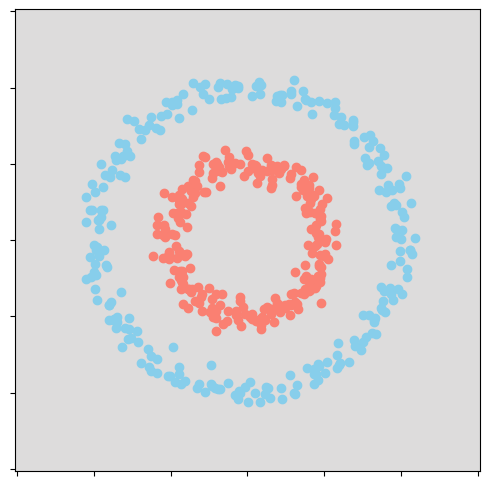

In [4]:
# Creamos dataset con dos anillos concéntricos de datos.
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

# Resolución del mapa de predicción.
res = 100

# Coordendadas del mapa de predicción.
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

# Input con cada combo de coordenadas del mapa de predicción.
_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

# Objeto vacio a 0.5 del mapa de predicción.
_pY = np.zeros((res, res)) + 0.5

# Visualización del mapa de predicción.
plt.figure(figsize=(6, 6))
plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1)

# Visualización de la nube de datos.
plt.scatter(X[Y == 0,0], X[Y == 0,1], c="skyblue")
plt.scatter(X[Y == 1,0], X[Y == 1,1], c="salmon")

plt.tick_params(labelbottom=False, labelleft=False)

#### **Redes Neuronales con Keras**

In [12]:
#Importamos TensorFlow y Keras
import tensorflow as tf
import tensorflow.keras as kr

from IPython.core.display import display, HTML

In [13]:
lr = 0.01           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.

In [14]:
# Creamos el objeto que contendrá a nuestra red neuronal, como secuencia de capas.
model = kr.Sequential()

In [15]:
# Capa 1
l1 = model.add(kr.layers.Dense(nn[1], activation='relu'))

# Capa 2
l2 = model.add(kr.layers.Dense(nn[2], activation='relu'))

# Capa 3
l3 = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))

# Compilamos el modelo, definiendo la función de coste y el optimizador.
model.compile(loss='mse', optimizer=kr.optimizers.SGD(lr=0.05), metrics=['acc'])

# Y entrenamos al modelo. Los callbacks
model.fit(X, Y, epochs=100)

Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 0.2352 - acc: 0.5000
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.2348 - acc: 0.5000
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.2343 - acc: 0.5000
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.2338 - acc: 0.5000
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.2334 - acc: 0.5080
Epoch 6/100
16/16 [==============================] - 0s 7ms/step - loss: 0.2330 - acc: 0.5420
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 0.2325 - acc: 0.5520
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.2321 - acc: 0.5600
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.2317 - acc: 0.5720
Epoch 10/100
16/16 [==============================] - 0s 3ms/step - loss: 0.2313 - acc: 0.5780
Epoch 11/100
16/16 [==============================] - 0s 3m

## Sklearn

In [ ]:
import sklearn as sk
import sklearn.neural_network

from IPython.core.display import display, HTML


lr = 0.01           # learning rate
nn = [2, 16, 8, 1]  # número de neuronas por capa.

# Creamos el objeto del modelo de red neuronal multicapa.
clf = sk.neural_network.MLPRegressor(solver='sgd',
                                     learning_rate_init=lr,
                                     hidden_layer_sizes=tuple(nn[1:]),
                                     verbose=True,
                                     n_iter_no_change=1000,
                                     batch_size = 64)


# Y lo entrenamos con nuestro datos.
clf.fit(X, Y)

Iteration 1, loss = 0.66391606
Iteration 2, loss = 0.29448667
Iteration 3, loss = 0.13429471
Iteration 4, loss = 0.13165037
Iteration 5, loss = 0.13430276
Iteration 6, loss = 0.12556423
Iteration 7, loss = 0.12292571
Iteration 8, loss = 0.12204933
Iteration 9, loss = 0.12175702
Iteration 10, loss = 0.12129750
Iteration 11, loss = 0.12073281
Iteration 12, loss = 0.12028767
Iteration 13, loss = 0.11983928
Iteration 14, loss = 0.11939207
Iteration 15, loss = 0.11909108
Iteration 16, loss = 0.11836549
Iteration 17, loss = 0.11771654
Iteration 18, loss = 0.11703195
Iteration 19, loss = 0.11636100
Iteration 20, loss = 0.11559426
Iteration 21, loss = 0.11475135
Iteration 22, loss = 0.11391514
Iteration 23, loss = 0.11296898
Iteration 24, loss = 0.11183055
Iteration 25, loss = 0.11070522
Iteration 26, loss = 0.10945900
Iteration 27, loss = 0.10807801
Iteration 28, loss = 0.10653328
Iteration 29, loss = 0.10483565
Iteration 30, loss = 0.10299502
Iteration 31, loss = 0.10109678
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size=64, beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(16, 8, 1), learning_rate='constant',
             learning_rate_init=0.01, max_iter=200, momentum=0.9,
             n_iter_no_change=1000, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='sgd', tol=0.0001,
             validation_fraction=0.1, verbose=True, warm_start=False)